In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r"C:\Users\LENOVO\Downloads\Data_Train.xlsx")

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.rename(columns={
    'Airline': 'flight_name',
    'Date_of_Journey': 'date',
    'Dep_Time': 'departure_time',
    'Source': 'departure_loc',
    'Duration': 'flight_duration',
    'Total_Stops': 'stops',
    'Arrival_Time': 'arrival_time',
    'Destination': 'arrival_loc',
    'Price': 'price'
}, inplace=True)

In [9]:
data.drop(columns=['Route', 'Additional_Info'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   flight_name      10683 non-null  object
 1   date             10683 non-null  object
 2   departure_loc    10683 non-null  object
 3   arrival_loc      10683 non-null  object
 4   departure_time   10683 non-null  object
 5   arrival_time     10683 non-null  object
 6   flight_duration  10683 non-null  object
 7   stops            10682 non-null  object
 8   price            10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


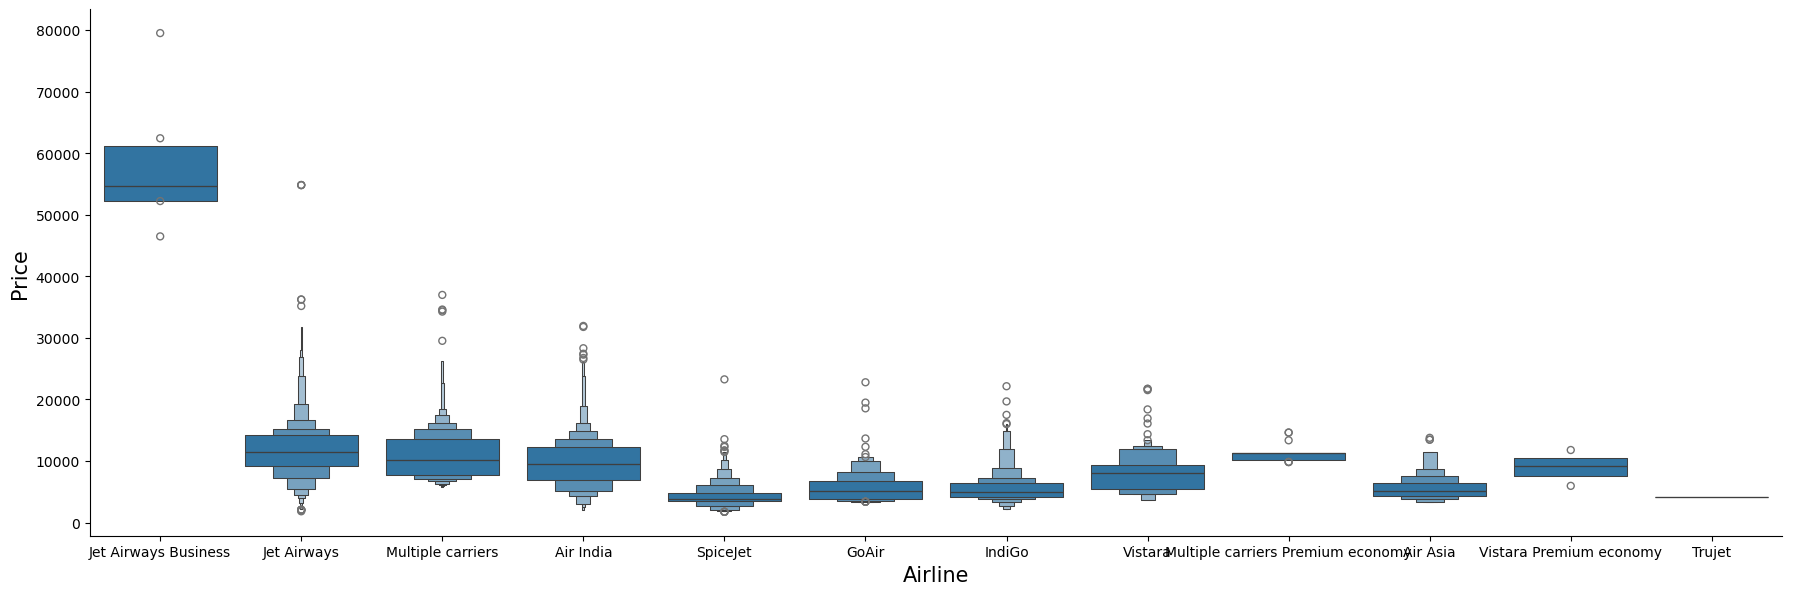

In [13]:
sns.catplot(y = 'price', x = 'flight_name', data = data.sort_values('price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airline',size=15)
plt.ylabel('Price',size=15)
plt.show()

In [15]:
data['departure_time'] = pd.to_datetime(data['departure_time'], format='%H:%M')

data['dep_hour'] = data['departure_time'].dt.hour
data['dep_min'] = data['departure_time'].dt.minute
data.head()

,flight_name,date,departure_loc,arrival_loc,departure_time,arrival_time,flight_duration,stops,price,dep_hour,dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,13:15,7h 25m,2 stops,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,23:30,5h 25m,1 stop,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,21:35,4h 45m,1 stop,13302,16,50


In [17]:
from datetime import datetime

def extract_arrival_hour_min(value):
    try:
        time_part = value.split(' ')[0]  
        dt = datetime.strptime(time_part, '%H:%M')
        return dt.hour, dt.minute
    except:
        return None, None 
data['arr_hour'], data['arr_min'] = zip(*data['arrival_time'].astype(str).map(extract_arrival_hour_min))
data.head()

,flight_name,date,departure_loc,arrival_loc,departure_time,arrival_time,flight_duration,stops,price,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,13:15,7h 25m,2 stops,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,23:30,5h 25m,1 stop,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,21:35,4h 45m,1 stop,13302,16,50,21,35


In [19]:
data['Journey_Day'] = pd.to_datetime(data['date'], format='%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data['date'], format='%d/%m/%Y').dt.month
data.head()

,flight_name,date,departure_loc,arrival_loc,departure_time,arrival_time,flight_duration,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,3897,22,20,1,10,24,3
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,13:15,7h 25m,2 stops,7662,5,50,13,15,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,13882,9,25,4,25,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,23:30,5h 25m,1 stop,6218,18,5,23,30,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,21:35,4h 45m,1 stop,13302,16,50,21,35,1,3


In [21]:
data.drop(['date','departure_time','arrival_time'], axis = 1, inplace = True)
data

,flight_name,departure_loc,arrival_loc,flight_duration,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,19,55,22,25,9,4
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,20,45,23,20,27,4
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,8,20,11,20,27,4
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,11,30,14,10,1,3


In [23]:
data['stops'].value_counts()

stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [25]:
data['stops'] = data['stops'].astype(str).str.strip().str.lower()
data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)
data

,flight_name,departure_loc,arrival_loc,flight_duration,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,19,55,22,25,9,4
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,20,45,23,20,27,4
10680,Jet Airways,Banglore,Delhi,3h,0,7229,8,20,11,20,27,4
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,11,30,14,10,1,3


In [27]:
data = data[pd.to_numeric(data['stops'], errors='coerce').notna()]
data['stops'].value_counts()

stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [29]:
data = data.copy()

duration = list(data['flight_duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

data.loc[:, 'Duration_hours'] = duration_hours
data.loc[:, 'Duration_mins'] = duration_mins

data.head()

,flight_name,departure_loc,arrival_loc,flight_duration,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,25,4,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,16,50,21,35,1,3,4,45


In [31]:
data['flight_name'].value_counts()

flight_name
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [33]:
Airline = data['flight_name']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [35]:
list1 = ['departure_loc', 'arrival_loc']
for l in list1:
    print(data[[l]].value_counts(), '\n')

departure_loc
Delhi            4536
Kolkata          2871
Banglore         2197
Mumbai            697
Chennai           381
Name: count, dtype: int64 

arrival_loc
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [37]:
data = pd.get_dummies(data = data, columns=list1, drop_first=True)
data.head()

,flight_name,flight_duration,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,...,Duration_mins,departure_loc_Chennai,departure_loc_Delhi,departure_loc_Kolkata,departure_loc_Mumbai,arrival_loc_Cochin,arrival_loc_Delhi,arrival_loc_Hyderabad,arrival_loc_Kolkata,arrival_loc_New Delhi
0,IndiGo,2h 50m,0,3897,22,20,1,10,24,3,...,50,False,False,False,False,False,False,False,False,True
1,Air India,7h 25m,2,7662,5,50,13,15,1,5,...,25,False,False,True,False,False,False,False,False,False
2,Jet Airways,19h,2,13882,9,25,4,25,9,6,...,0,False,True,False,False,True,False,False,False,False
3,IndiGo,5h 25m,1,6218,18,5,23,30,12,5,...,25,False,False,True,False,False,False,False,False,False
4,IndiGo,4h 45m,1,13302,16,50,21,35,1,3,...,45,False,False,False,False,False,False,False,False,True


In [39]:
data = pd.concat([data, Airline], axis = 1)
data.head()

,flight_name,flight_duration,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,2h 50m,0,3897,22,20,1,10,24,3,...,False,True,False,False,False,False,False,False,False,False
1,Air India,7h 25m,2,7662,5,50,13,15,1,5,...,False,False,False,False,False,False,False,False,False,False
2,Jet Airways,19h,2,13882,9,25,4,25,9,6,...,False,False,True,False,False,False,False,False,False,False
3,IndiGo,5h 25m,1,6218,18,5,23,30,12,5,...,False,True,False,False,False,False,False,False,False,False
4,IndiGo,4h 45m,1,13302,16,50,21,35,1,3,...,False,True,False,False,False,False,False,False,False,False


In [41]:
data.drop(['flight_name'],axis=1,inplace=True)
data.head()

,flight_duration,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,2h 50m,0,3897,22,20,1,10,24,3,2,...,False,True,False,False,False,False,False,False,False,False
1,7h 25m,2,7662,5,50,13,15,1,5,7,...,False,False,False,False,False,False,False,False,False,False
2,19h,2,13882,9,25,4,25,9,6,19,...,False,False,True,False,False,False,False,False,False,False
3,5h 25m,1,6218,18,5,23,30,12,5,5,...,False,True,False,False,False,False,False,False,False,False
4,4h 45m,1,13302,16,50,21,35,1,3,4,...,False,True,False,False,False,False,False,False,False,False


In [43]:
data.columns

Index(['flight_duration', 'stops', 'price', 'dep_hour', 'dep_min', 'arr_hour',
       'arr_min', 'Journey_Day', 'Journey_Month', 'Duration_hours',
       'Duration_mins', 'departure_loc_Chennai', 'departure_loc_Delhi',
       'departure_loc_Kolkata', 'departure_loc_Mumbai', 'arrival_loc_Cochin',
       'arrival_loc_Delhi', 'arrival_loc_Hyderabad', 'arrival_loc_Kolkata',
       'arrival_loc_New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [45]:
data.drop(['flight_duration'],axis=1,inplace=True)
data.head()

,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,22,20,1,10,24,3,2,50,...,False,True,False,False,False,False,False,False,False,False
1,2,7662,5,50,13,15,1,5,7,25,...,False,False,False,False,False,False,False,False,False,False
2,2,13882,9,25,4,25,9,6,19,0,...,False,False,True,False,False,False,False,False,False,False
3,1,6218,18,5,23,30,12,5,5,25,...,False,True,False,False,False,False,False,False,False,False
4,1,13302,16,50,21,35,1,3,4,45,...,False,True,False,False,False,False,False,False,False,False


In [47]:
X = data.loc[:, ['stops', 'price', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
                 'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
                 'departure_loc_Chennai', 'departure_loc_Delhi', 'departure_loc_Kolkata', 'departure_loc_Mumbai',
                 'arrival_loc_Cochin', 'arrival_loc_Delhi', 'arrival_loc_Hyderabad', 'arrival_loc_Kolkata',
                 'arrival_loc_New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
                 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
                 'Vistara Premium economy']]

X.head()

,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,22,20,1,10,24,3,2,50,...,False,True,False,False,False,False,False,False,False,False
1,2,7662,5,50,13,15,1,5,7,25,...,False,False,False,False,False,False,False,False,False,False
2,2,13882,9,25,4,25,9,6,19,0,...,False,False,True,False,False,False,False,False,False,False
3,1,6218,18,5,23,30,12,5,5,25,...,False,True,False,False,False,False,False,False,False,False
4,1,13302,16,50,21,35,1,3,4,45,...,False,True,False,False,False,False,False,False,False,False


In [49]:
y = data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: price, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=3, random_state=123)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R² Score:", r2_rf)

accuracy_rf = r2_rf * 100 
print("Accuracy :", accuracy_rf)

Random Forest Performance:
Mean Absolute Error: 1127.7410650359348
Mean Squared Error: 3305436.703241939
Root Mean Squared Error: 1818.085999957631
R² Score: 0.8345946516646636
Accuracy : 83.45946516646636


D:\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


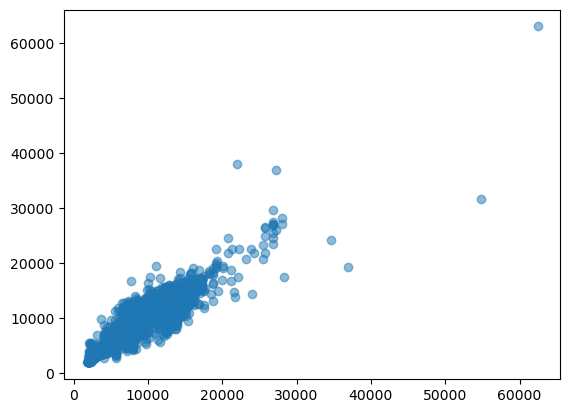

In [55]:
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.show()

In [57]:
import joblib
def prepare_inputs_all_airlines(departure, arrival, date, total_stops):
    journey_date = datetime.strptime(date, '%Y-%m-%d')
    journey_day = journey_date.day
    journey_month = journey_date.month

    # Dummy time values
    dep_hour = 10
    dep_min = 15
    arr_hour = 13
    arr_min = 30
    duration_hours = arr_hour - dep_hour
    duration_mins = arr_min - dep_min

    # One-hot column names
    departure_locs = ['Chennai', 'Delhi', 'Kolkata', 'Mumbai']
    arrival_locs = ['Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']
    airlines = ['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
                'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
                'Trujet', 'Vistara', 'Vistara Premium economy']

    input_rows = []

    for airline in airlines:
        row = {
            'stops': total_stops,
            'Journey_Day': journey_day,
            'Journey_Month': journey_month,
            'dep_hour': dep_hour,
            'dep_min': dep_min,
            'arr_hour': arr_hour,
            'arr_min': arr_min,
            'Duration_hours': duration_hours,
            'Duration_mins': duration_mins,
        }

        # One-hot encode departure
        for loc in departure_locs:
            row[f'departure_loc_{loc}'] = 1 if departure == loc else 0

        # One-hot encode arrival
        for loc in arrival_locs:
            row[f'arrival_loc_{loc}'] = 1 if arrival == loc else 0

        # One-hot encode airlines
        for a in airlines:
            row[a] = 1 if a == airline else 0

        input_rows.append(row)

    return pd.DataFrame(input_rows), airlines

In [61]:
joblib.dump(rf_model, 'flight_price_model.pkl')
model = joblib.load('flight_price_model.pkl')

In [63]:
import json

model_columns = list(X_train.columns)  

with open('model_columns.json', 'w') as f:
    json.dump(model_columns, f)